In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

dirpath_root = Path().resolve().parent

In [2]:
fpath_csv = (
    dirpath_root / 'model' /
    'rates_npops_2_nmodels_512_npts_32_seed_113_ws_1_hs_2_uni_dt_0.25_nt_100' /
    'nout=2_roll=5888_nhid_2_szhid_128_batch_256_lr_0.0010_ep_500.csv'
)

X = pd.read_csv(fpath_csv, index_col=0)
X

,err,lre_max,limg_max,rmax,rmin,habs,hmax,lre_abs_max,lre_abs_min,det,det_abs
0,0.096481,0.490660,0.0,8.898408,6.438421,1.580284,1.495406,0.49066,0.387582,-0.190171,0.190171
1,0.216766,0.490660,0.0,7.160621,4.139511,1.584026,1.297399,0.49066,0.387582,-0.190171,0.190171
2,0.105434,0.490660,0.0,8.974827,3.770615,1.907366,1.903131,0.49066,0.387582,-0.190171,0.190171
3,0.082407,0.490660,0.0,8.545412,4.310197,1.140552,1.090707,0.49066,0.387582,-0.190171,0.190171
4,0.101016,0.490660,0.0,9.089195,5.960614,1.105184,0.821758,0.49066,0.387582,-0.190171,0.190171
...,...,...,...,...,...,...,...,...,...,...,...
3291,0.071322,0.336264,0.0,6.681627,4.749591,1.626756,1.266653,1.33759,0.336264,-0.449784,0.449784
3292,0.203489,0.336264,0.0,7.368829,6.638152,2.526641,1.829997,1.33759,0.336264,-0.449784,0.449784
3293,0.068640,0.336264,0.0,7.644625,5.058404,1.313298,1.236881,1.33759,0.336264,-0.449784,0.449784
3294,0.118752,0.336264,0.0,8.895613,6.808598,0.917386,0.869104,1.33759,0.336264,-0.449784,0.449784


In [30]:
from sklearn.manifold import TSNE

# Run t-SNE
#X_ = X
X_ = X.loc[X.err > 1]
#X_feats = X_
X_feats = X_.drop(columns='err')
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X_feats)

In [19]:
X.columns

Index(['err', 'lre_max', 'limg_max', 'rmax', 'rmin', 'habs', 'hmax',
       'lre_abs_max', 'lre_abs_min', 'det', 'det_abs'],
      dtype='object')

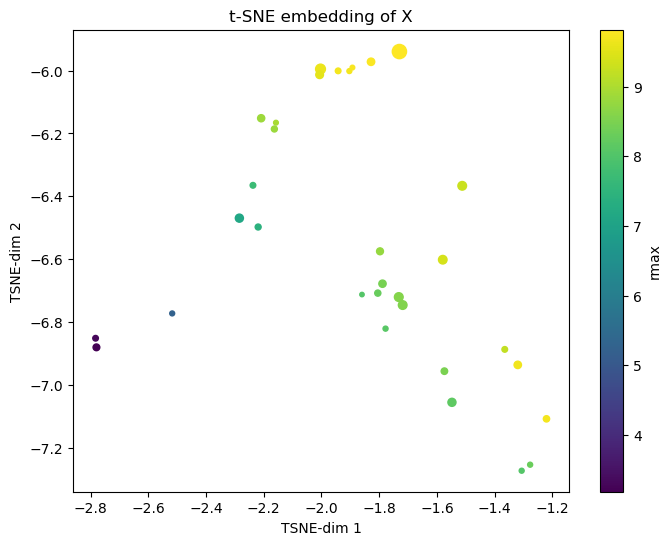

In [32]:
svar = 'err'

cvar = 'rmax'

plt.figure(figsize=(8,6))
#plt.figure()
scatter = plt.scatter(X_2d[:,0], X_2d[:,1],
                      #c=np.log(X_[cvar]),
                      c=X_[cvar],
                      cmap='viridis',
                      s=X_[svar] * 10
                      )
plt.colorbar(scatter, label=cvar)
plt.xlabel('TSNE-dim 1')
plt.ylabel('TSNE-dim 2')
plt.title('t-SNE embedding of X')
plt.show()